# Load results

In [1]:
import os
import pandas as pd
import json
import matplotlib.pyplot as plt

pd.set_option('display.max_colwidth', 0)
pd.set_option('display.max_columns', 999)
# pd.set_option('display.max_rows', 999)

def load_results(walk_path: str):
    df_aggregate = pd.DataFrame(columns=['metric', 'val_prec', 'val_recall', 'val_f1', 'test_prec', 'test_recall', 'test_f1', 'seed'])
    for root, dirs, files in os.walk(walk_path):
        for F in files:
            filename = os.path.join(root, F)
            if filename.endswith('config.json'):
                filename_config = filename
                flags = filename.split('/')
                
                df = pd.read_json(filename_config)
                params = json.load(open(filename.replace('config.json', 'test_results_benchmark.json')))['learnable params']
                df = df.drop(['config'], axis = 1)
                df = df.dropna()
                df = df.reset_index()
                df = df.rename(columns={'index': 'metric'})

                df['val_prec'] = df['val_results'].apply(lambda x: x['P'])
                df['val_recall'] = df['val_results'].apply(lambda x: x['R'])
                df['val_f1'] = df['val_results'].apply(lambda x: x['F1'])
                df['test_prec'] = df['test_results'].apply(lambda x: x['P'])
                df['test_recall'] = df['test_results'].apply(lambda x: x['R'])
                df['test_f1'] = df['test_results'].apply(lambda x: x['F1'])
                df['name'] = flags[24].split('_')[0]
                df['params'] = round(params / 1e6, 2)
                df['freeze_enc'] = 'FT' if flags[8].split('_')[-1] == '0' else 'frozen'
                df['lora'] = 'LoRA' if flags[22].split('_')[-1] == '1' else '/'
                df['tag_emb'] = flags[13].split('_')[-1]
                df['tag_rnn'] = flags[14].split('_')[-1]
                df['par_rnn'] = flags[15].split('_')[3].upper() if flags[15].split('_')[3] != 'none' else '/'
                df['par_rnn_l'] = flags[15].split('_')[-2][-1]
                par_rnn_h = flags[15].split('_')[-1][1:]
                df['par_rnn_h'] = par_rnn_h if par_rnn_h != 'none' else '0'
                df['data'] = flags[18].split('=')[-1]
                df['par_type'] = flags[19].split('_')[2]
                df['par_n_layers'] = flags[19].split('_')[3]
                df['mlp_h'] = flags[19].split('_')[-1]
                df['arc_norm'] = flags[20].split('_')[-1]
                df['par_res'] = flags[21].split('_')[-1]
                
                df['seed'] = flags[-2].split('_')[-1]
                # df['filename'] = filename
                df = df.drop(['val_results', 'test_results'], axis = 1)
                
                df_aggregate = pd.concat([df_aggregate, df])
    print(df_aggregate.columns)
    return df_aggregate

# LSTM ablations

In [2]:
import pandas as pd

walk_path = '/home/pgajo/projects/def-hsajjad/pgajo/Multitask-RFG-torch/results_lstm_size_ablations'
df_aggregate = load_results(walk_path)

df_aggregate.drop_duplicates()

df_aggregate = df_aggregate[df_aggregate['metric'] == 'parser_labeled_results']
# df_aggregate = df_aggregate[df_aggregate['tag_emb'] == '0']
# df_aggregate = df_aggregate[df_aggregate['mlp_h'] == '500']
# df_aggregate = df_aggregate[df_aggregate['par_rnn_l'] == '2']
# df_aggregate = df_aggregate[df_aggregate['seed'] == '1']
# df_aggregate = df_aggregate[df_aggregate['data'] == 'yamakata']

display(df_aggregate)
dataset_list = df_aggregate['data'].unique()

/tmp/ipykernel_2484801/4212157547.py:53: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_aggregate = pd.concat([df_aggregate, df])


Index(['metric', 'val_prec', 'val_recall', 'val_f1', 'test_prec',
       'test_recall', 'test_f1', 'seed', 'name', 'params', 'freeze_enc',
       'lora', 'tag_emb', 'tag_rnn', 'par_rnn', 'par_rnn_l', 'par_rnn_h',
       'data', 'par_type', 'par_n_layers', 'mlp_h', 'arc_norm', 'par_res'],
      dtype='object')


,metric,val_prec,val_recall,val_f1,test_prec,test_recall,test_f1,seed,name,params,freeze_enc,lora,tag_emb,tag_rnn,par_rnn,par_rnn_l,par_rnn_h,data,par_type,par_n_layers,mlp_h,arc_norm,par_res
1,parser_labeled_results,0.2794,0.2590,0.2688,0.3432,0.2839,0.3108,1,bert-base-uncased,3.02,frozen,/,0,0,LSTM,2,200,scierc,simple,0,300,1,0
1,parser_labeled_results,0.3102,0.2370,0.2687,0.4106,0.2830,0.3351,2,bert-base-uncased,3.02,frozen,/,0,0,LSTM,2,200,scierc,simple,0,300,1,0
1,parser_labeled_results,0.2509,0.2080,0.2274,0.2999,0.2450,0.2697,0,bert-base-uncased,3.02,frozen,/,0,0,LSTM,2,200,scierc,simple,0,300,1,0
1,parser_labeled_results,0.2668,0.2300,0.2470,0.3289,0.2645,0.2932,2,bert-base-uncased,3.02,frozen,/,0,0,LSTM,2,200,scierc,simple,0,300,0,0
1,parser_labeled_results,0.2663,0.2370,0.2508,0.3337,0.2691,0.2979,1,bert-base-uncased,3.02,frozen,/,0,0,LSTM,2,200,scierc,simple,0,300,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,parser_labeled_results,0.6739,0.5119,0.5819,0.6654,0.5082,0.5763,2,bert-base-uncased,3.85,frozen,/,1,0,LSTM,1,300,conll04,simple,0,500,1,0
1,parser_labeled_results,0.7175,0.5266,0.6074,0.6731,0.5202,0.5868,0,bert-base-uncased,3.85,frozen,/,1,0,LSTM,1,300,conll04,simple,0,500,1,0
1,parser_labeled_results,0.5845,0.5266,0.5541,0.5282,0.5037,0.5157,1,bert-base-uncased,3.85,frozen,/,1,0,LSTM,1,300,conll04,simple,0,500,0,0
1,parser_labeled_results,0.5366,0.5248,0.5306,0.5113,0.5052,0.5083,2,bert-base-uncased,3.85,frozen,/,1,0,LSTM,1,300,conll04,simple,0,500,0,0


## Test F1 vs LSTM number of layers

In [7]:
df_filtered = df_aggregate[df_aggregate['tag_emb'] == '0']

,metric,mlp_h,par_rnn_l,arc_norm,data,test_f1,df_std
0,parser_labeled_results,100,0,0,ade,0.547900,0.006139
1,parser_labeled_results,100,0,1,ade,0.554600,0.005059
2,parser_labeled_results,100,1,0,ade,0.649809,0.021238
3,parser_labeled_results,100,1,1,ade,0.655055,0.014164
4,parser_labeled_results,100,2,0,ade,0.662236,0.021030
5,parser_labeled_results,100,2,1,ade,0.667118,0.022973
6,parser_labeled_results,100,3,0,ade,0.670836,0.023700
7,parser_labeled_results,100,3,1,ade,0.663036,0.021407
8,parser_labeled_results,300,0,0,ade,0.525067,0.027802
9,parser_labeled_results,300,0,1,ade,0.550500,0.006463


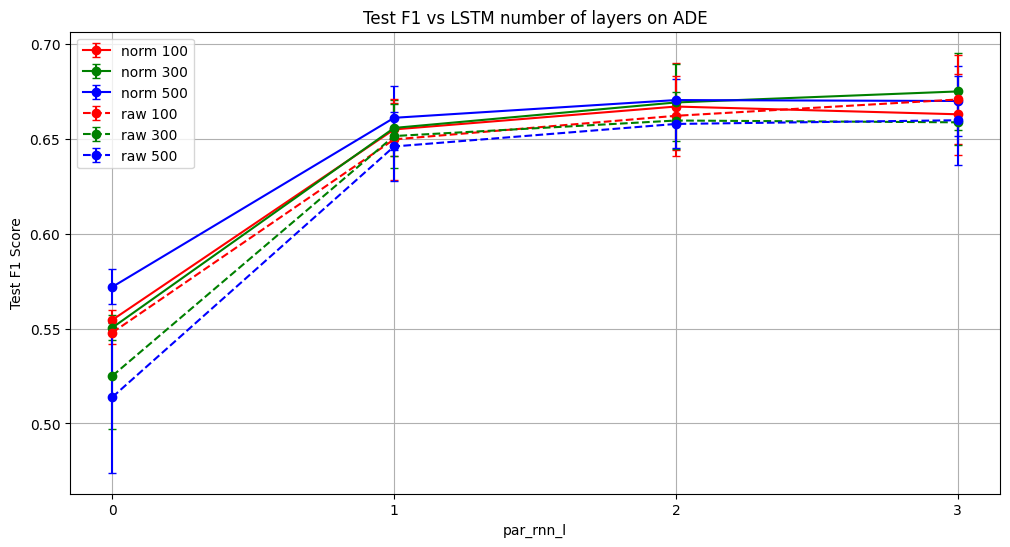

,metric,mlp_h,par_rnn_l,arc_norm,data,test_f1,df_std
0,parser_labeled_results,100,0,0,conll04,0.406400,0.025647
1,parser_labeled_results,100,0,1,conll04,0.431567,0.019895
2,parser_labeled_results,100,1,0,conll04,0.554682,0.030982
3,parser_labeled_results,100,1,1,conll04,0.558882,0.025430
4,parser_labeled_results,100,2,0,conll04,0.583345,0.016910
5,parser_labeled_results,100,2,1,conll04,0.581530,0.016928
6,parser_labeled_results,100,3,0,conll04,0.583073,0.024312
7,parser_labeled_results,100,3,1,conll04,0.580060,0.019922
8,parser_labeled_results,300,0,0,conll04,0.408200,0.001825
9,parser_labeled_results,300,0,1,conll04,0.446500,0.043501


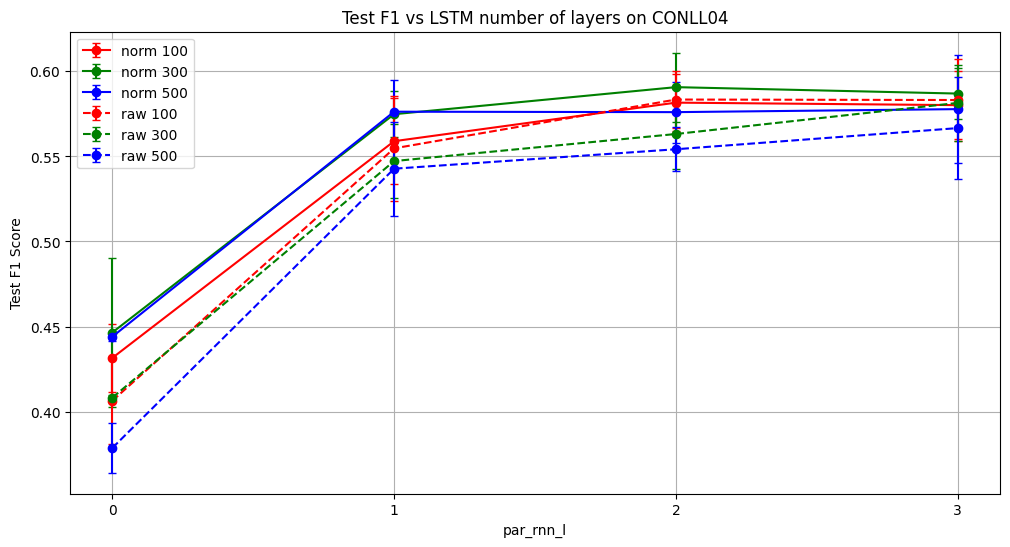

,metric,mlp_h,par_rnn_l,arc_norm,data,test_f1,df_std
0,parser_labeled_results,100,0,0,scierc,0.119433,0.011633
1,parser_labeled_results,100,0,1,scierc,0.151467,0.004020
2,parser_labeled_results,100,1,0,scierc,0.269973,0.021832
3,parser_labeled_results,100,1,1,scierc,0.274770,0.023492
4,parser_labeled_results,100,2,0,scierc,0.273173,0.015989
5,parser_labeled_results,100,2,1,scierc,0.299850,0.018528
6,parser_labeled_results,100,3,0,scierc,0.295264,0.020389
7,parser_labeled_results,100,3,1,scierc,0.298040,0.017290
8,parser_labeled_results,300,0,0,scierc,0.143300,0.041173
9,parser_labeled_results,300,0,1,scierc,0.194367,0.011697


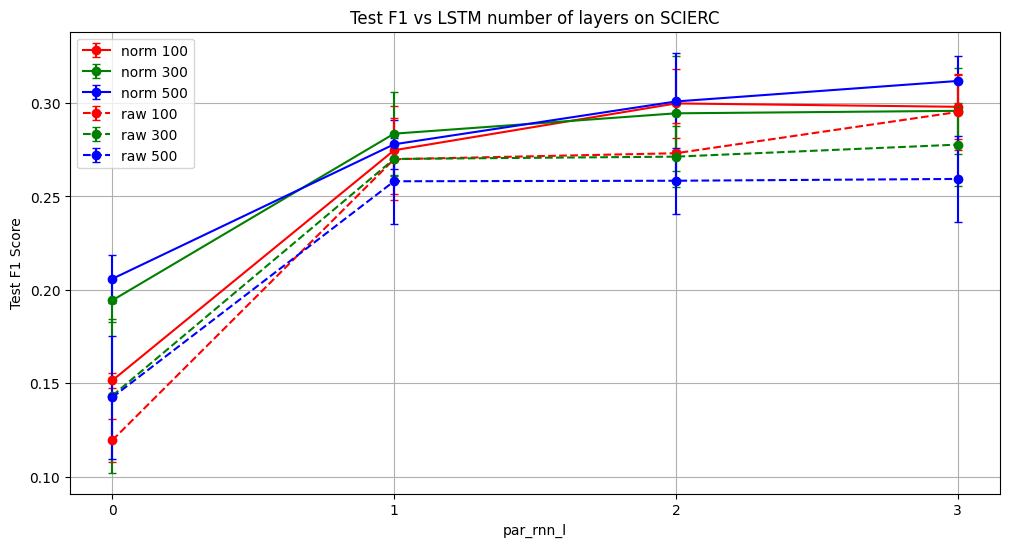

,metric,mlp_h,par_rnn_l,arc_norm,data,test_f1,df_std
0,parser_labeled_results,100,0,0,yamakata,0.480100,0.011650
1,parser_labeled_results,100,0,1,yamakata,0.524267,0.002957
2,parser_labeled_results,100,1,0,yamakata,0.585773,0.012613
3,parser_labeled_results,100,1,1,yamakata,0.596690,0.015621
4,parser_labeled_results,100,2,0,yamakata,0.609609,0.012609
5,parser_labeled_results,100,2,1,yamakata,0.614280,0.014248
6,parser_labeled_results,100,3,0,yamakata,0.620127,0.007639
7,parser_labeled_results,100,3,1,yamakata,0.615130,0.007795
8,parser_labeled_results,300,0,0,yamakata,0.480667,0.006144
9,parser_labeled_results,300,0,1,yamakata,0.534533,0.009493


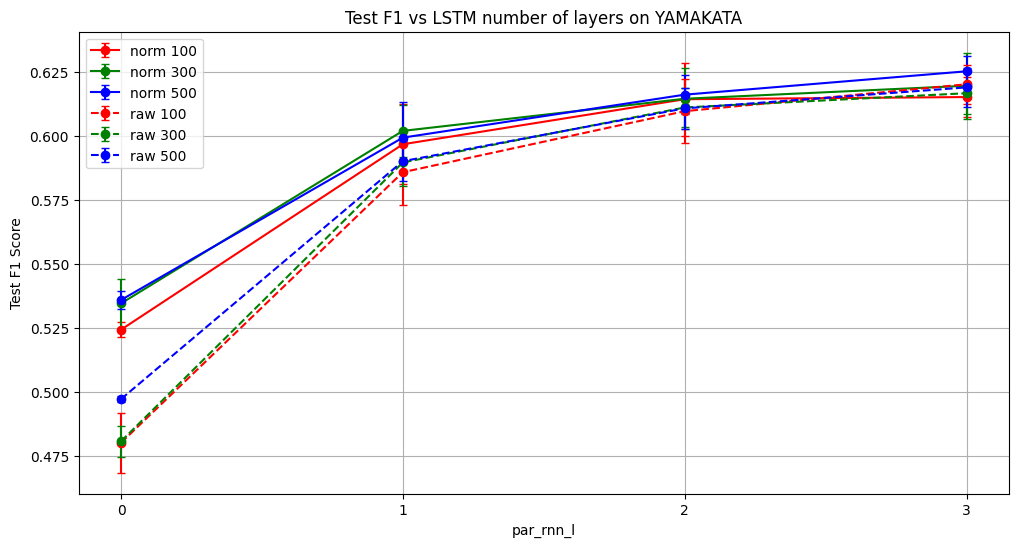

In [8]:
for dataset in sorted(df_filtered['data'].unique()):
    df_data = df_filtered[df_filtered['data'] == dataset]
    
    df_grouped = (
        df_data
        .groupby([
            'metric',
            'mlp_h',
            # 'par_rnn_h',
            'par_rnn_l',
            'arc_norm',
            # 'tag_emb',
            'data',
        ])['test_f1']
        .agg(['mean', 'std'])
        .reset_index()
        .rename(columns={'mean': 'test_f1', 'std': 'df_std'})
    )

    display(df_grouped)
    df_norm_sm = df_grouped[(df_grouped['arc_norm'] == '1') & (df_grouped['mlp_h'] == '100')]
    df_norm_md = df_grouped[(df_grouped['arc_norm'] == '1') & (df_grouped['mlp_h'] == '300')]
    df_norm_lg = df_grouped[(df_grouped['arc_norm'] == '1') & (df_grouped['mlp_h'] == '500')]

    df_raw_sm = df_grouped[(df_grouped['arc_norm'] == '0') & (df_grouped['mlp_h'] == '100')]
    df_raw_md = df_grouped[(df_grouped['arc_norm'] == '0') & (df_grouped['mlp_h'] == '300')]
    df_raw_lg = df_grouped[(df_grouped['arc_norm'] == '0') & (df_grouped['mlp_h'] == '500')]

    df_norm_sm = df_norm_sm.sort_values('par_rnn_l')
    df_norm_md = df_norm_md.sort_values('par_rnn_l')
    df_norm_lg = df_norm_lg.sort_values('par_rnn_l')
    df_raw_sm = df_raw_sm.sort_values('par_rnn_l')
    df_raw_md = df_raw_md.sort_values('par_rnn_l')
    df_raw_lg = df_raw_lg.sort_values('par_rnn_l')

    x_norm_sm = df_norm_sm['par_rnn_l'].astype(int).tolist()
    f1_norm_sm = df_norm_sm['test_f1'].tolist()
    x_norm_md = df_norm_md['par_rnn_l'].astype(int).tolist()
    f1_norm_md = df_norm_md['test_f1'].tolist()
    x_norm_lg = df_norm_lg['par_rnn_l'].astype(int).tolist()
    f1_norm_lg = df_norm_lg['test_f1'].tolist()

    x_raw_sm = df_raw_sm['par_rnn_l'].astype(int).tolist()
    f1_raw_sm = df_raw_sm['test_f1'].tolist()
    x_raw_md = df_raw_md['par_rnn_l'].astype(int).tolist()
    f1_raw_md = df_raw_md['test_f1'].tolist()
    x_raw_lg = df_raw_lg['par_rnn_l'].astype(int).tolist()
    f1_raw_lg = df_raw_lg['test_f1'].tolist()


    std_norm_sm = df_norm_sm['df_std'].tolist()
    std_norm_md = df_norm_md['df_std'].tolist()
    std_norm_lg = df_norm_lg['df_std'].tolist()

    std_raw_sm = df_raw_sm['df_std'].tolist()
    std_raw_md = df_raw_md['df_std'].tolist()
    std_raw_lg = df_raw_lg['df_std'].tolist()

    plt.figure(figsize=(12, 6))
    plt.title(f'Test F1 vs LSTM number of layers on {dataset.upper()}')

    # Normalized curves with error bars
    plt.errorbar(x_norm_sm, f1_norm_sm, yerr=std_norm_sm,
                fmt='-o', capsize=3, label='norm 100', color='red')
    plt.errorbar(x_norm_md, f1_norm_md, yerr=std_norm_md,
                fmt='-o', capsize=3, label='norm 300', color='green')
    plt.errorbar(x_norm_lg, f1_norm_lg, yerr=std_norm_lg,
                fmt='-o', capsize=3, label='norm 500', color='blue')

    # Raw curves with error bars (dashed markers)
    plt.errorbar(x_raw_sm, f1_raw_sm, yerr=std_raw_sm,
                fmt='--o', capsize=3, label='raw 100', color='red')
    plt.errorbar(x_raw_md, f1_raw_md, yerr=std_raw_md,
                fmt='--o', capsize=3, label='raw 300', color='green')
    plt.errorbar(x_raw_lg, f1_raw_lg, yerr=std_raw_lg,
                fmt='--o', capsize=3, label='raw 500', color='blue')

    # integer x‐ticks
    xticks = sorted(df_grouped['par_rnn_l'].astype(int).unique())
    plt.xticks(xticks)
    plt.gca().xaxis.set_major_locator(plt.MaxNLocator(integer=True))

    plt.xlabel('par_rnn_l')
    plt.ylabel("Test F1 Score")
    plt.legend()
    plt.grid(True)
    plt.show()
    plt.close()

## Test F1 vs LSTM hidden size

,metric,mlp_h,par_rnn_h,arc_norm,data,test_f1,df_std
0,parser_labeled_results,100,0,0,ade,0.547033,0.032981
1,parser_labeled_results,100,0,1,ade,0.572767,0.023460
2,parser_labeled_results,100,100,0,ade,0.663022,0.007915
3,parser_labeled_results,100,100,1,ade,0.662011,0.019510
4,parser_labeled_results,100,200,0,ade,0.654089,0.023702
5,parser_labeled_results,100,200,1,ade,0.668200,0.026690
6,parser_labeled_results,100,300,0,ade,0.655933,0.018164
7,parser_labeled_results,100,300,1,ade,0.665000,0.018323
8,parser_labeled_results,100,400,0,ade,0.660017,0.016313
9,parser_labeled_results,100,400,1,ade,0.656767,0.021285


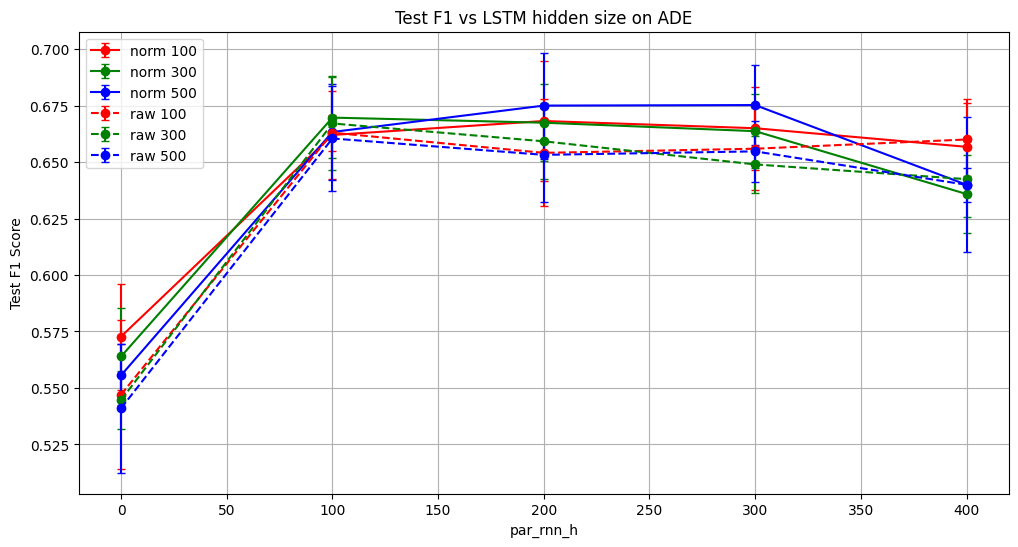

,metric,mlp_h,par_rnn_h,arc_norm,data,test_f1,df_std
0,parser_labeled_results,100,0,0,conll04,0.403967,0.021224
1,parser_labeled_results,100,0,1,conll04,0.418367,0.006806
2,parser_labeled_results,100,100,0,conll04,0.569200,0.032765
3,parser_labeled_results,100,100,1,conll04,0.566822,0.032068
4,parser_labeled_results,100,200,0,conll04,0.579589,0.020245
5,parser_labeled_results,100,200,1,conll04,0.591144,0.015527
6,parser_labeled_results,100,300,0,conll04,0.574878,0.023087
7,parser_labeled_results,100,300,1,conll04,0.581344,0.022152
8,parser_labeled_results,100,400,0,conll04,0.578250,0.013265
9,parser_labeled_results,100,400,1,conll04,0.572433,0.018241


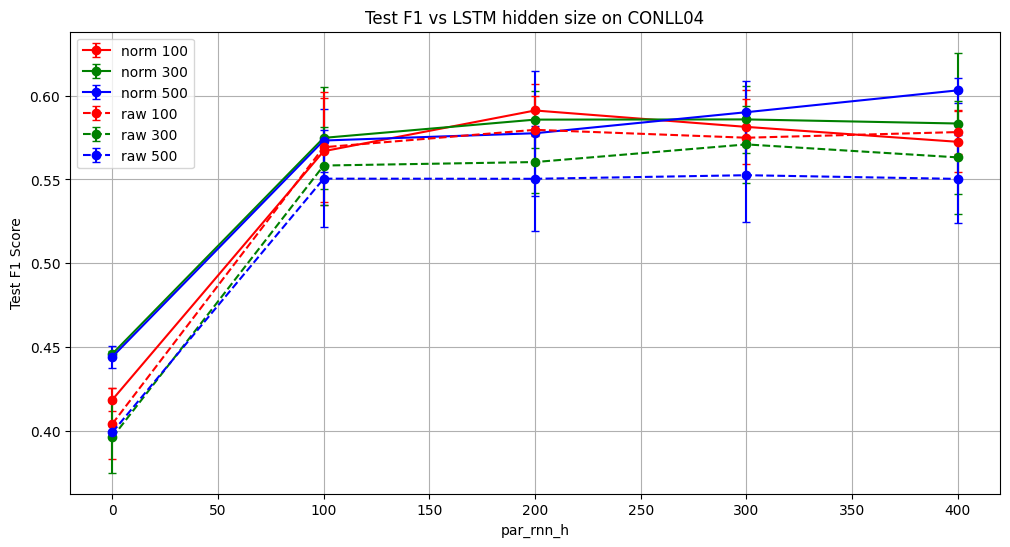

,metric,mlp_h,par_rnn_h,arc_norm,data,test_f1,df_std
0,parser_labeled_results,100,0,0,scierc,0.124467,0.035474
1,parser_labeled_results,100,0,1,scierc,0.141267,0.012471
2,parser_labeled_results,100,100,0,scierc,0.278544,0.017836
3,parser_labeled_results,100,100,1,scierc,0.279011,0.017983
4,parser_labeled_results,100,200,0,scierc,0.286711,0.027583
5,parser_labeled_results,100,200,1,scierc,0.294400,0.011415
6,parser_labeled_results,100,300,0,scierc,0.296644,0.018443
7,parser_labeled_results,100,300,1,scierc,0.286867,0.019875
8,parser_labeled_results,100,400,0,scierc,0.284850,0.020747
9,parser_labeled_results,100,400,1,scierc,0.287867,0.024093


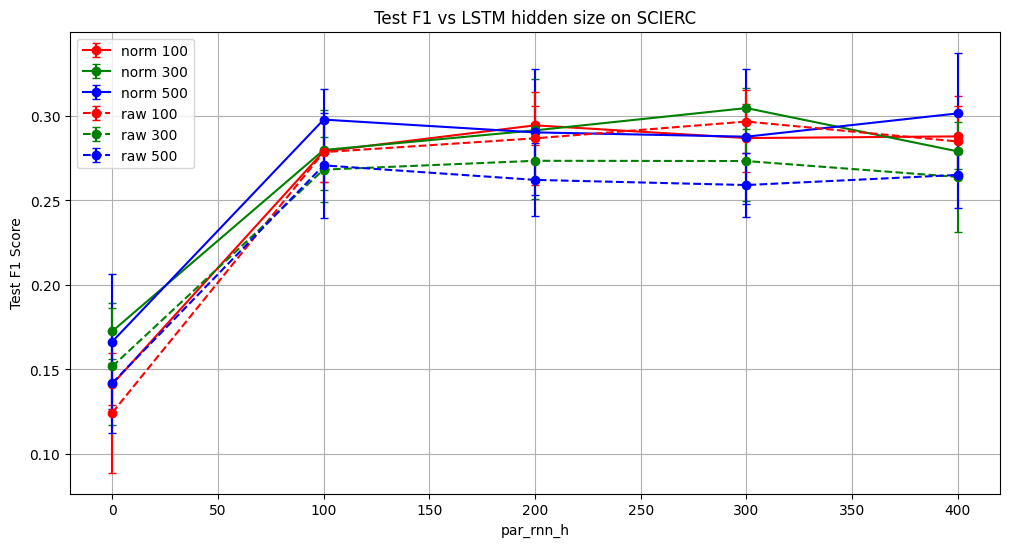

,metric,mlp_h,par_rnn_h,arc_norm,data,test_f1,df_std
0,parser_labeled_results,100,0,0,yamakata,0.475600,0.005957
1,parser_labeled_results,100,0,1,yamakata,0.517400,0.005231
2,parser_labeled_results,100,100,0,yamakata,0.596122,0.016563
3,parser_labeled_results,100,100,1,yamakata,0.603067,0.013691
4,parser_labeled_results,100,200,0,yamakata,0.609022,0.015304
5,parser_labeled_results,100,200,1,yamakata,0.609833,0.011420
6,parser_labeled_results,100,300,0,yamakata,0.611978,0.012731
7,parser_labeled_results,100,300,1,yamakata,0.610478,0.014969
8,parser_labeled_results,100,400,0,yamakata,0.620017,0.012186
9,parser_labeled_results,100,400,1,yamakata,0.618367,0.008538


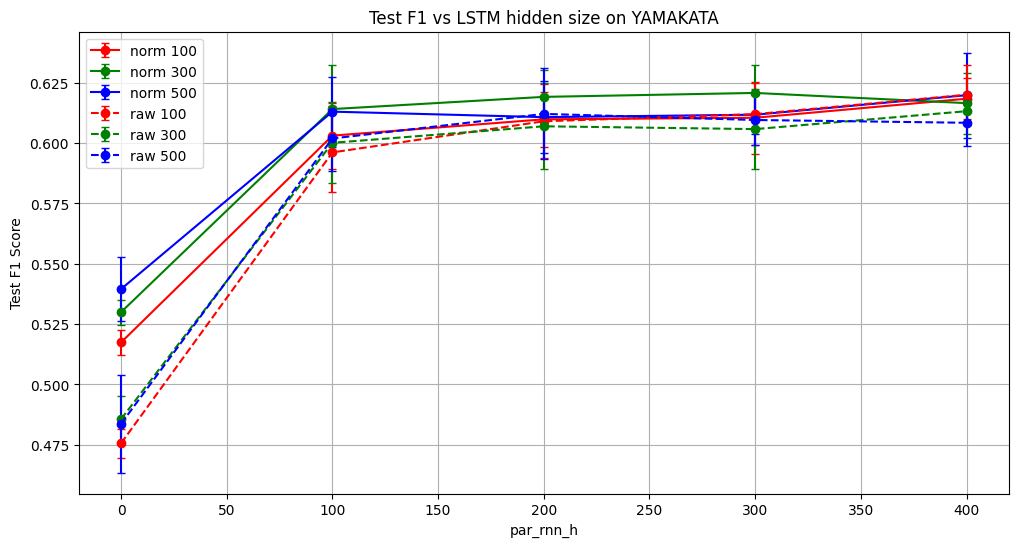

In [ ]:
for dataset in sorted(dataset_list):
    df_data = df_filtered[df_filtered['data'] == dataset]
    
    df_grouped = (
        df_data
        .groupby([
            'metric',
            'mlp_h',
            'par_rnn_h',
            # 'par_rnn_l',
            'arc_norm',
            # 'tag_emb',
            'data',
        ])['test_f1']
        .agg(['mean', 'std'])
        .reset_index()
        .rename(columns={'mean': 'test_f1', 'std': 'df_std'})
    )

    display(df_grouped)
    df_norm_sm = df_grouped[(df_grouped['arc_norm'] == '1') & (df_grouped['mlp_h'] == '100')]
    df_norm_md = df_grouped[(df_grouped['arc_norm'] == '1') & (df_grouped['mlp_h'] == '300')]
    df_norm_lg = df_grouped[(df_grouped['arc_norm'] == '1') & (df_grouped['mlp_h'] == '500')]

    df_raw_sm = df_grouped[(df_grouped['arc_norm'] == '0') & (df_grouped['mlp_h'] == '100')]
    df_raw_md = df_grouped[(df_grouped['arc_norm'] == '0') & (df_grouped['mlp_h'] == '300')]
    df_raw_lg = df_grouped[(df_grouped['arc_norm'] == '0') & (df_grouped['mlp_h'] == '500')]

    df_norm_sm = df_norm_sm.sort_values('par_rnn_h')
    df_norm_md = df_norm_md.sort_values('par_rnn_h')
    df_norm_lg = df_norm_lg.sort_values('par_rnn_h')
    df_raw_sm = df_raw_sm.sort_values('par_rnn_h')
    df_raw_md = df_raw_md.sort_values('par_rnn_h')
    df_raw_lg = df_raw_lg.sort_values('par_rnn_h')

    x_norm_sm = df_norm_sm['par_rnn_h'].astype(int).tolist()
    f1_norm_sm = df_norm_sm['test_f1'].tolist()
    x_norm_md = df_norm_md['par_rnn_h'].astype(int).tolist()
    f1_norm_md = df_norm_md['test_f1'].tolist()
    x_norm_lg = df_norm_lg['par_rnn_h'].astype(int).tolist()
    f1_norm_lg = df_norm_lg['test_f1'].tolist()

    x_raw_sm = df_raw_sm['par_rnn_h'].astype(int).tolist()
    f1_raw_sm = df_raw_sm['test_f1'].tolist()
    x_raw_md = df_raw_md['par_rnn_h'].astype(int).tolist()
    f1_raw_md = df_raw_md['test_f1'].tolist()
    x_raw_lg = df_raw_lg['par_rnn_h'].astype(int).tolist()
    f1_raw_lg = df_raw_lg['test_f1'].tolist()


    std_norm_sm = df_norm_sm['df_std'].tolist()
    std_norm_md = df_norm_md['df_std'].tolist()
    std_norm_lg = df_norm_lg['df_std'].tolist()

    std_raw_sm = df_raw_sm['df_std'].tolist()
    std_raw_md = df_raw_md['df_std'].tolist()
    std_raw_lg = df_raw_lg['df_std'].tolist()

    plt.figure(figsize=(12, 6))
    plt.title(f'Test F1 vs LSTM hidden size on {dataset.upper()}')

    # Normalized curves with error bars
    plt.errorbar(x_norm_sm, f1_norm_sm, yerr=std_norm_sm,
                fmt='-o', capsize=3, label='norm 100', color='red')
    plt.errorbar(x_norm_md, f1_norm_md, yerr=std_norm_md,
                fmt='-o', capsize=3, label='norm 300', color='green')
    plt.errorbar(x_norm_lg, f1_norm_lg, yerr=std_norm_lg,
                fmt='-o', capsize=3, label='norm 500', color='blue')

    # Raw curves with error bars (dashed markers)
    plt.errorbar(x_raw_sm, f1_raw_sm, yerr=std_raw_sm,
                fmt='--o', capsize=3, label='raw 100', color='red')
    plt.errorbar(x_raw_md, f1_raw_md, yerr=std_raw_md,
                fmt='--o', capsize=3, label='raw 300', color='green')
    plt.errorbar(x_raw_lg, f1_raw_lg, yerr=std_raw_lg,
                fmt='--o', capsize=3, label='raw 500', color='blue')

    # integer x‐ticks
    xticks = sorted(df_grouped['par_rnn_h'].astype(int).unique())
    plt.xticks(xticks)
    plt.gca().xaxis.set_major_locator(plt.MaxNLocator(integer=True))

    plt.xlabel('par_rnn_h')
    plt.ylabel("Test F1 Score")
    plt.legend()
    plt.grid(True)
    plt.show()
    plt.close()

## Test F1 vs MLP output dim

,mlp_h,par_rnn_l,arc_norm,test_f1,df_std
0,100,0,0,0.547033,0.032981
1,100,0,1,0.572767,0.023460
2,100,1,0,0.651855,0.018182
3,100,1,1,0.646580,0.008913
4,100,2,0,0.665664,0.014912
5,100,2,1,0.662910,0.018492
6,100,3,0,0.656800,0.016693
7,100,3,1,0.683230,0.015490
8,300,0,0,0.544667,0.012722
9,300,0,1,0.563933,0.021574


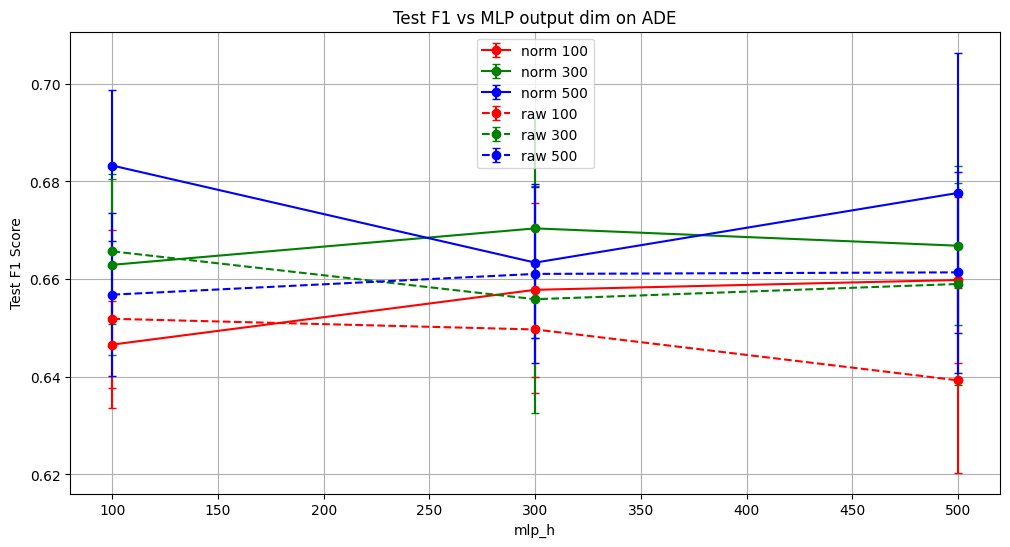

,mlp_h,par_rnn_l,arc_norm,test_f1,df_std
0,100,0,0,0.403967,0.021224
1,100,0,1,0.418367,0.006806
2,100,1,0,0.558936,0.024474
3,100,1,1,0.560760,0.018980
4,100,2,0,0.575282,0.012801
5,100,2,1,0.582790,0.026215
6,100,3,0,0.591464,0.020292
7,100,3,1,0.593560,0.016897
8,300,0,0,0.395867,0.020992
9,300,0,1,0.445767,0.001504


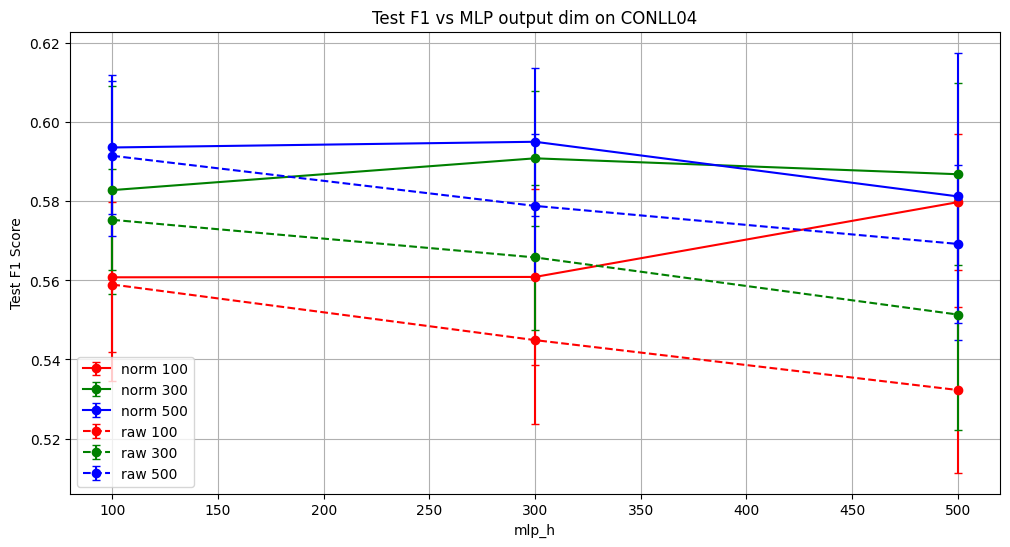

,mlp_h,par_rnn_l,arc_norm,test_f1,df_std
0,100,0,0,0.124467,0.035474
1,100,0,1,0.141267,0.012471
2,100,1,0,0.275045,0.024035
3,100,1,1,0.275340,0.011434
4,100,2,0,0.286673,0.017586
5,100,2,1,0.286850,0.016845
6,100,3,0,0.298845,0.017400
7,100,3,1,0.298420,0.017081
8,300,0,0,0.151767,0.034878
9,300,0,1,0.172633,0.016426


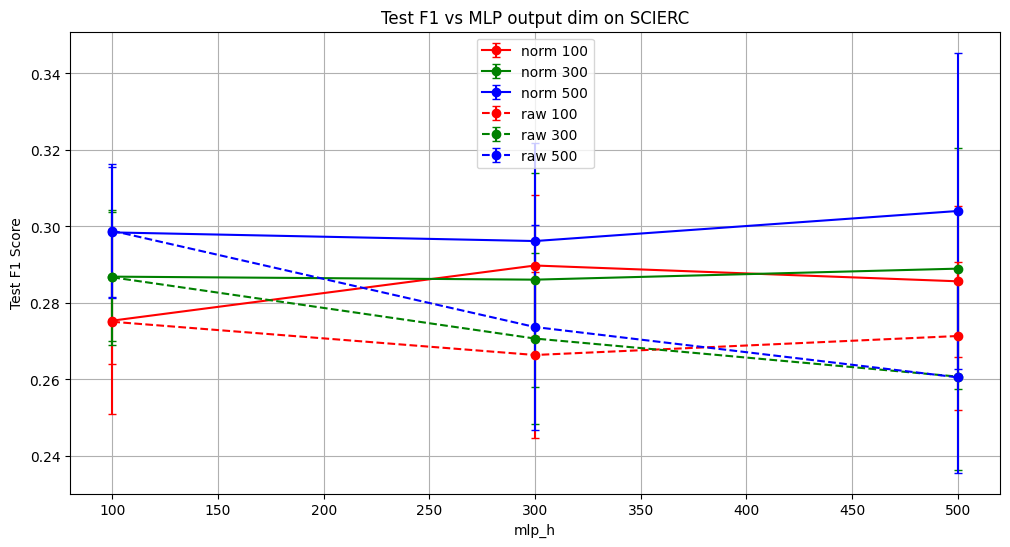

,mlp_h,par_rnn_l,arc_norm,test_f1,df_std
0,100,0,0,0.475600,0.005957
1,100,0,1,0.517400,0.005231
2,100,1,0,0.592500,0.013354
3,100,1,1,0.595250,0.010617
4,100,2,0,0.612073,0.010730
5,100,2,1,0.613400,0.009011
6,100,3,0,0.620355,0.009781
7,100,3,1,0.617900,0.007191
8,300,0,0,0.485600,0.009650
9,300,0,1,0.529933,0.005231


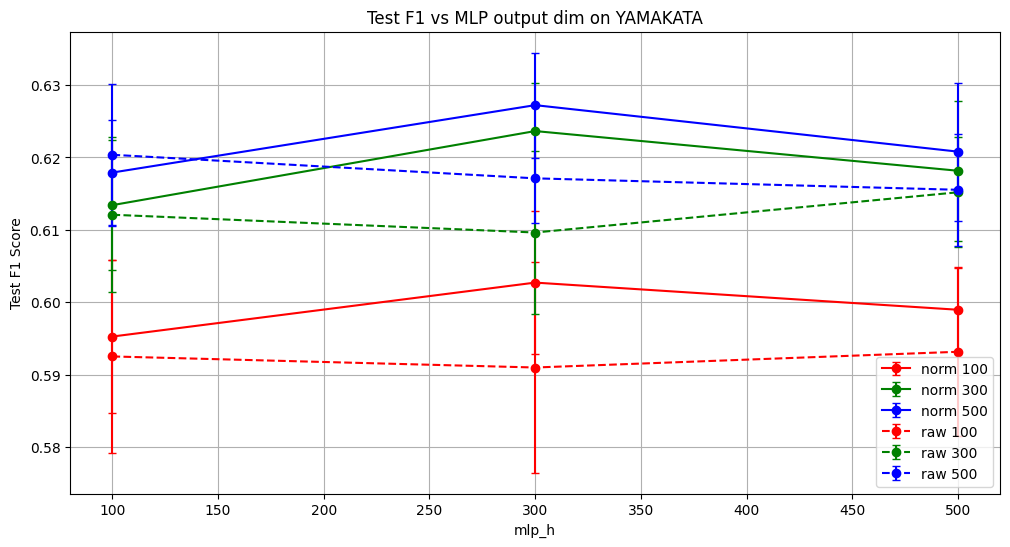

In [5]:
for dataset in sorted(dataset_list):
    df_data = df_filtered[df_filtered['data'] == dataset]
    criterion = 'mlp_h'
    df_grouped = (
        df_data
        .groupby([
            # 'metric',
            'mlp_h',
            # criterion,
            'par_rnn_l',
            # 'par_rnn_h',
            'arc_norm',
            # 'tag_emb',
            # 'data',
        ])['test_f1']
        .agg(['mean', 'std'])
        .reset_index()
        .rename(columns={'mean': 'test_f1', 'std': 'df_std'})
    )

    display(df_grouped)
    df_norm_sm = df_grouped[(df_grouped['arc_norm'] == '1') & (df_grouped['par_rnn_l'] == '0')]
    df_norm_sm = df_grouped[(df_grouped['arc_norm'] == '1') & (df_grouped['par_rnn_l'] == '1')]
    df_norm_md = df_grouped[(df_grouped['arc_norm'] == '1') & (df_grouped['par_rnn_l'] == '2')]
    df_norm_lg = df_grouped[(df_grouped['arc_norm'] == '1') & (df_grouped['par_rnn_l'] == '3')]
    df_raw_sm = df_grouped[(df_grouped['arc_norm'] == '0') & (df_grouped['par_rnn_l'] == '0')]
    df_raw_sm = df_grouped[(df_grouped['arc_norm'] == '0') & (df_grouped['par_rnn_l'] == '1')]
    df_raw_md = df_grouped[(df_grouped['arc_norm'] == '0') & (df_grouped['par_rnn_l'] == '2')]
    df_raw_lg = df_grouped[(df_grouped['arc_norm'] == '0') & (df_grouped['par_rnn_l'] == '3')]

    df_norm_sm = df_norm_sm.sort_values(criterion)
    df_norm_md = df_norm_md.sort_values(criterion)
    df_norm_lg = df_norm_lg.sort_values(criterion)
    df_raw_sm = df_raw_sm.sort_values(criterion)
    df_raw_md = df_raw_md.sort_values(criterion)
    df_raw_lg = df_raw_lg.sort_values(criterion)

    x_norm_sm = df_norm_sm[criterion].astype(int).tolist()
    f1_norm_sm = df_norm_sm['test_f1'].tolist()
    x_norm_md = df_norm_md[criterion].astype(int).tolist()
    f1_norm_md = df_norm_md['test_f1'].tolist()
    x_norm_lg = df_norm_lg[criterion].astype(int).tolist()
    f1_norm_lg = df_norm_lg['test_f1'].tolist()

    x_raw_sm = df_raw_sm[criterion].astype(int).tolist()
    f1_raw_sm = df_raw_sm['test_f1'].tolist()
    x_raw_md = df_raw_md[criterion].astype(int).tolist()
    f1_raw_md = df_raw_md['test_f1'].tolist()
    x_raw_lg = df_raw_lg[criterion].astype(int).tolist()
    f1_raw_lg = df_raw_lg['test_f1'].tolist()


    std_norm_sm = df_norm_sm['df_std'].tolist()
    std_norm_md = df_norm_md['df_std'].tolist()
    std_norm_lg = df_norm_lg['df_std'].tolist()

    std_raw_sm = df_raw_sm['df_std'].tolist()
    std_raw_md = df_raw_md['df_std'].tolist()
    std_raw_lg = df_raw_lg['df_std'].tolist()

    plt.figure(figsize=(12, 6))
    plt.title(f'Test F1 vs MLP output dim on {dataset.upper()}')

    # Normalized curves with error bars
    plt.errorbar(x_norm_sm, f1_norm_sm, yerr=std_norm_sm,
                fmt='-o', capsize=3, label='norm 100', color='red')
    plt.errorbar(x_norm_md, f1_norm_md, yerr=std_norm_md,
                fmt='-o', capsize=3, label='norm 300', color='green')
    plt.errorbar(x_norm_lg, f1_norm_lg, yerr=std_norm_lg,
                fmt='-o', capsize=3, label='norm 500', color='blue')

    # Raw curves with error bars (dashed markers)
    plt.errorbar(x_raw_sm, f1_raw_sm, yerr=std_raw_sm,
                fmt='--o', capsize=3, label='raw 100', color='red')
    plt.errorbar(x_raw_md, f1_raw_md, yerr=std_raw_md,
                fmt='--o', capsize=3, label='raw 300', color='green')
    plt.errorbar(x_raw_lg, f1_raw_lg, yerr=std_raw_lg,
                fmt='--o', capsize=3, label='raw 500', color='blue')

    # integer x‐ticks
    xticks = sorted(df_grouped[criterion].astype(int).unique())
    plt.xticks(xticks)
    plt.gca().xaxis.set_major_locator(plt.MaxNLocator(integer=True))

    plt.xlabel(criterion)
    plt.ylabel("Test F1 Score")
    plt.legend()
    plt.grid(True)
    plt.show()
    plt.close()

# LoRA

In [ ]:
walk_path = '/home/pgajo/projects/def-hsajjad/pgajo/Multitask-RFG-torch/results_steps'
df_aggregate = load_results(walk_path)

dataset_list = [
    'ade',
    'conll04',
    'scierc',
    'yamakata'
    ]

# for dataset in dataset_list:
    # df_aggregate = df_aggregate[df_aggregate['data'] == dataset]
df_aggregate = df_aggregate[df_aggregate['metric'] == 'parser_labeled_results']
df_aggregate = df_aggregate.sort_values(by='test_f1', ascending=False)
df_aggregate = df_aggregate[df_aggregate['test_f1'] > 0.1]
df_group = (
    df_aggregate
    .groupby(['metric',
            # 'arc_norm',
            # 'tag_emb',
            # 'params',
            'data',
            'lora',
            ])['test_f1']
    .agg(['mean', 'std'])
    .reset_index()
    .rename(columns={'mean': 'test_f1', 'std': 'df_std'})
)

df_group = df_group.sort_values(by='test_f1', ascending=False)
display(df_group)